# AOP File Integration

ampscan now has the ability to read and write AOP file. A typical workflow may involve: 
- Load two .stl files
- Align using ICP
- Save as AOP files
- Reload as STL files

In [1]:
from ampscan import AmpObject, align, registration, analyse
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load in two stl files

In [3]:
base = AmpObject('stl_file.stl')
move = AmpObject('stl_file_2.stl')
base.rotateAng([0,0,-90], ang='deg')
move.rotateAng([0,0,-90], ang='deg')
base.hc_smooth(beta=0.6, n=5)
move.hc_smooth(beta=0.6, n=5)

Align base so distal end is centered

In [4]:
minZ = base.getVert()[:, 2].min()
maxZ = base.getVert()[:, 2].max()
totZ = maxZ - minZ

distVLog = base.getVert()[:, 2] < (minZ + (totZ * 0.05))
xShift = base.getVert()[distVLog, 0].mean()
yShift = base.getVert()[distVLog, 1].mean()

base.translate([-xShift, -yShift, 0])

Automatically align the two files

In [5]:
al = align(move, base).getAlign()

In [6]:
# min and max of base 
minBaseZ = base.getVert()[:, 2].min()
maxBaseZ = base.getVert()[:, 2].max()
# min and max of al
minAlZ = al.getVert()[:, 2].min()
maxAlZ = al.getVert()[:, 2].max()

# get the largest min and smallest max
maxZ = min(maxBaseZ, maxAlZ)
minZ = max(minBaseZ, minAlZ)
totZ = maxZ - minZ

# Add a small adjustment factor so slices are valid 
maxZ -= (totZ * 0.01)
minZ += (totZ * 0.01)

Manually create the slice heights 

In [7]:
slices = np.linspace(minZ, maxZ, 100)
spokes = 72

Write the two .aop files

In [8]:
base.save_aop('stl_file.aop', slices = slices, spokes = 72, closeEnd=False, centreEnd=False)
al.save_aop('stl_file_2.aop', slices = slices, spokes = 72, closeEnd=False, centreEnd=False)

Load back in the objects and visualise

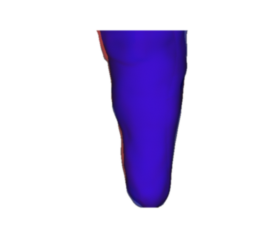

In [9]:
base_aop = AmpObject('stl_file.aop')
move_aop = AmpObject('stl_file_2.aop')
base_aop.rotateAng([0,0,45], ang='deg')
move_aop.rotateAng([0,0,45], ang='deg')
al = align(move_aop, base_aop, maxiter=0)
import matplotlib.pyplot as plt
plt.axis('off')
im = al.genIm(crop='False')[0]
ax = plt.imshow(im, interpolation='bicubic')